In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,   consensus_score, ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("credit.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [6]:
# Filling missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [6]:
# Split features and target 
X = df.drop(["Class"], axis=1).values 
y = df["Class"].values

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
### EVALUATION FUNCTION
def evaluate_model(true,predicted):
    acc = accuracy_score(true,predicted)
    prec = precision_score(true, predicted)
    rec = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    roc = roc_auc_score(true, predicted)
    return acc, prec, rec, f1, roc

In [9]:
### Models
models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True)
}

\LogisticRegression
 Accuracy: 0.9987
 Precision: 0.6222
 Recall: 0.5714
 F1 Score: 0.5957
 ROC-AUC: 0.7854


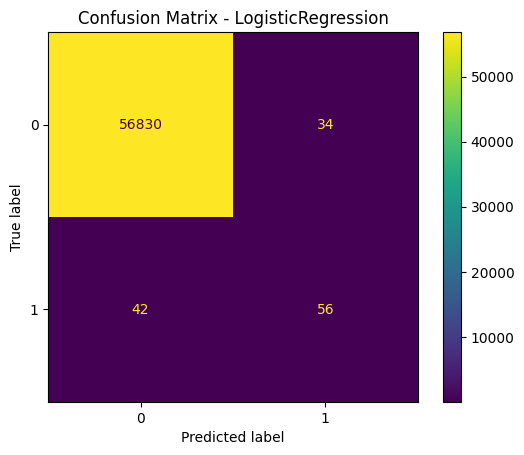

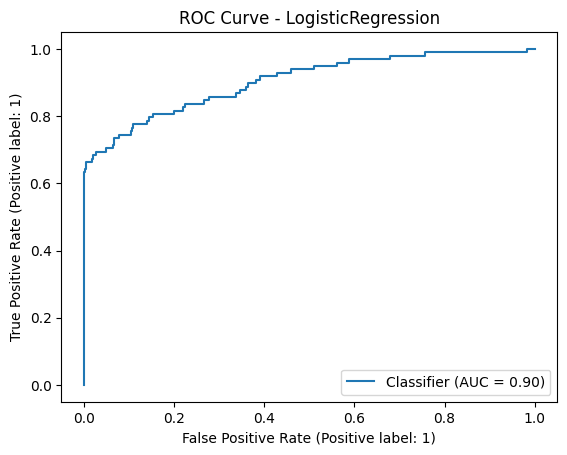

\KNN
 Accuracy: 0.9984
 Precision: 1.0000
 Recall: 0.0510
 F1 Score: 0.0971
 ROC-AUC: 0.5255


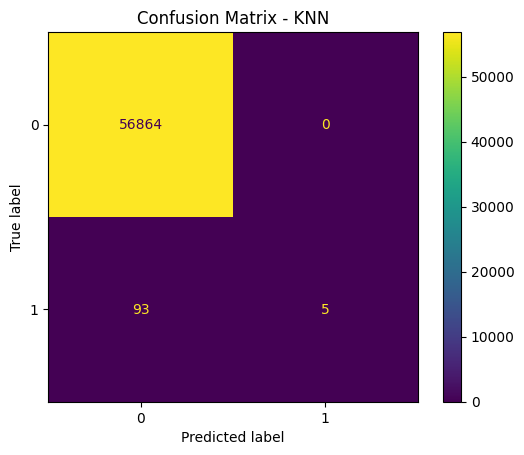

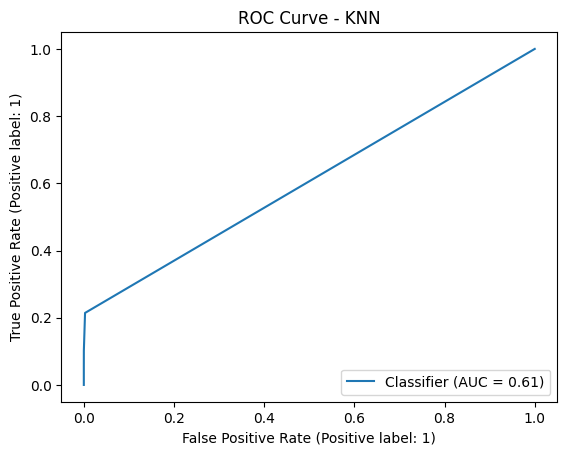

\Decision Tree
 Accuracy: 0.9992
 Precision: 0.7431
 Recall: 0.8265
 F1 Score: 0.7826
 ROC-AUC: 0.9130


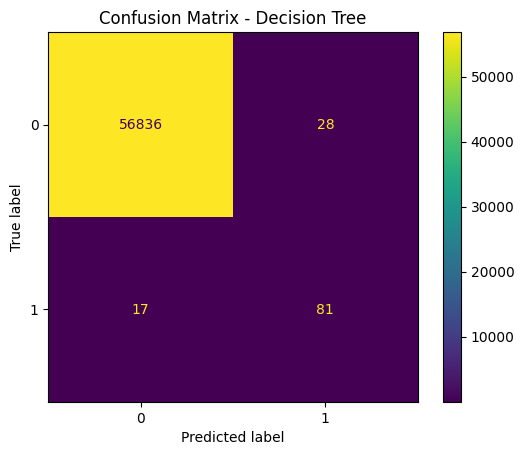

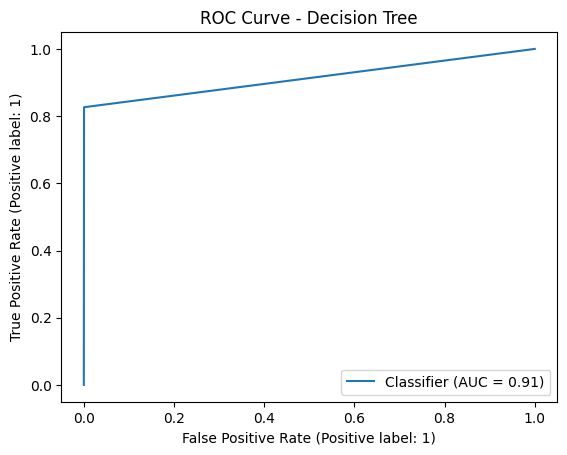

\Random Forest
 Accuracy: 0.9996
 Precision: 0.9740
 Recall: 0.7653
 F1 Score: 0.8571
 ROC-AUC: 0.8826


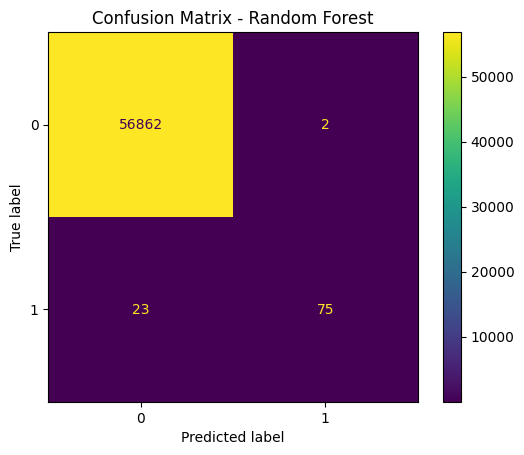

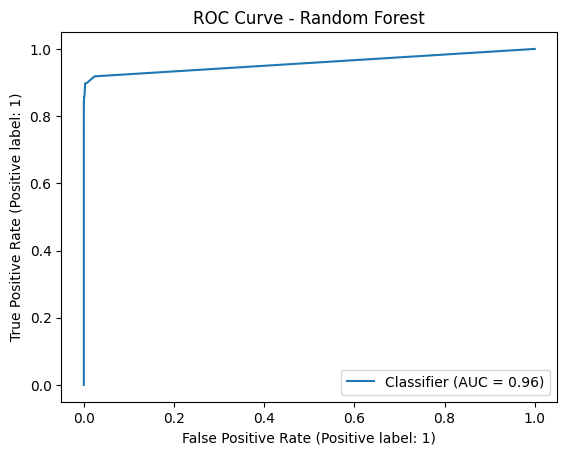

\XGBoost
 Accuracy: 0.9996
 Precision: 0.9620
 Recall: 0.7755
 F1 Score: 0.8588
 ROC-AUC: 0.8877


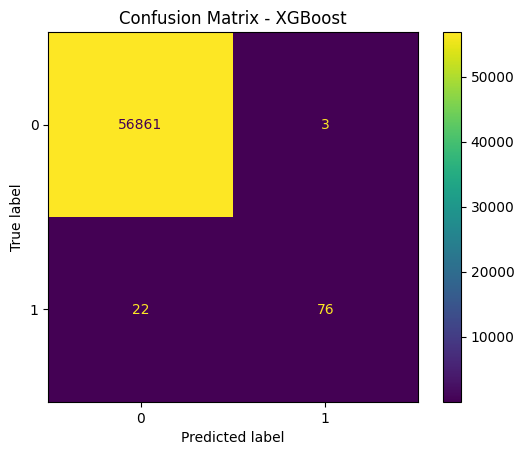

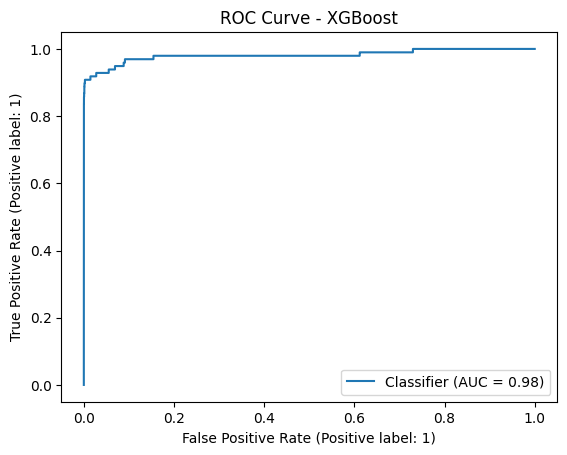

\SVM
 Accuracy: 0.9983
 Precision: 0.0000
 Recall: 0.0000
 F1 Score: 0.0000
 ROC-AUC: 0.5000


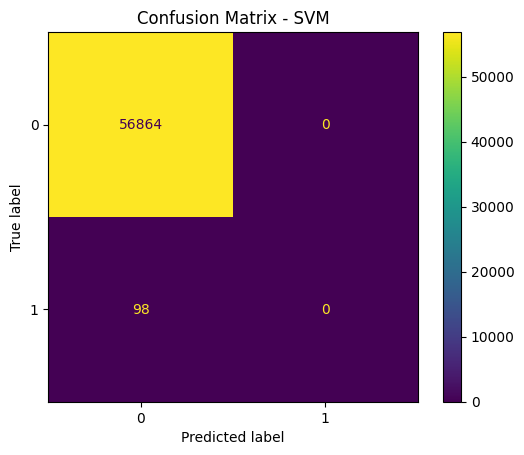

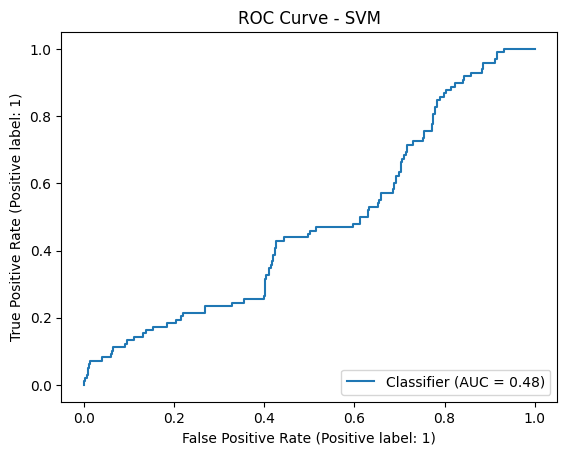

In [10]:
## Training and Evaluation
model_list=[]
f1_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc, prec,rec, f1, roc = evaluate_model(y_test, y_pred)

    print(f"\{name}")
    print(f" Accuracy: {acc:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f" Recall: {rec:.4f}")
    print(f" F1 Score: {f1:.4f}")
    print(f" ROC-AUC: {roc:.4f}")
    print("=" * 40)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show

    # ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"ROC Curve - {name}")
    plt.show()

    # Store results
    model_list.append(name)
    f1_list.append(f1)

In [11]:
# Create DataFrame of model performance
results_df = pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'F1_Score'])

# Sort by F1 Score
results_df = results_df.sort_values(by='F1_Score', ascending=False)

# Display the results
print(results_df)


           Model Name  F1_Score
4             XGBoost  0.858757
3       Random Forest  0.857143
2       Decision Tree  0.782609
0  LogisticRegression  0.595745
1                 KNN  0.097087
5                 SVM  0.000000


In [12]:
log_model = LogisticRegression(max_iter=1000)
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 99.89


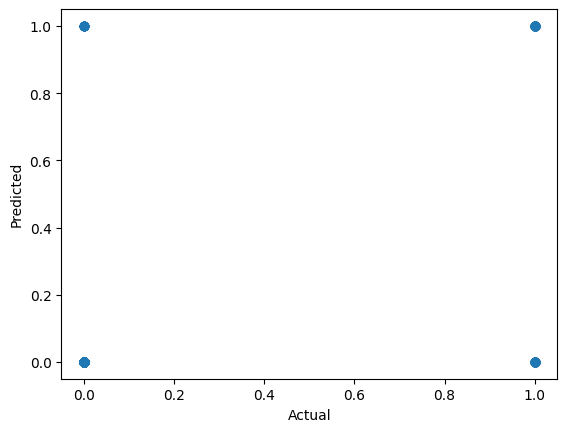

In [13]:
## Plot y_test and y_pred
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: >

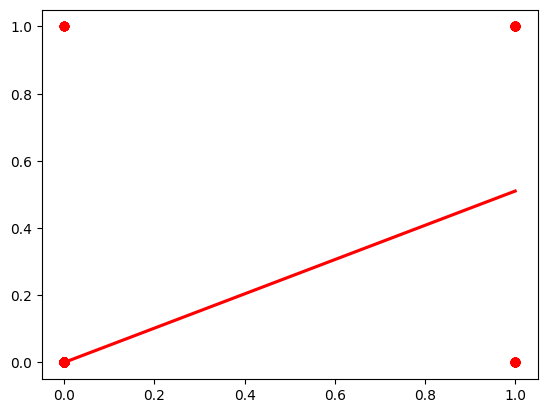

In [14]:
sns.regplot(x=y_test, y=y_pred, ci=None,color='red')

In [15]:
## Difference between Actual and Predicted Values
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test ^ y_pred  # Will be 1 for mismatch, 0 for match
})